In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [93]:
visitors = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/health/vistors.csv")
governorates_hospitals = pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/DATA_ANALYSIS/health/hospitalsbygovernrate.csv")

In [94]:
visitors.head()

,Governorates,Total Number of Visitors in Outpatient Department
0,Cairo,947964
1,Alexandria,891186
2,Port Said,64109
3,Suez,180240
4,Ismailia,87170


In [95]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   Governorates                                       26 non-null     object
 1   Total Number of Visitors in Outpatient Department  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 544.0+ bytes


In [ ]:
visitors["Population"]

In [ ]:
governorates_hospitals.head()

,Governorates,Population,Hospitals,Beds,Intensive Care Beds,Incubators,Dialysis Devices,Respirators (oxygen cylinders),Total
0,Cairo,"10,248,385",102,18095,127,133.0,253.0,239.0,NaN
1,Alexandria,"5,546,663",37,7114,132,56.0,195.0,261.0,NaN
2,Port Said,"791,749",5,137,5,NaN,NaN,NaN,NaN
3,Suez,"792,551",10,602,17,24.0,58.0,45.0,NaN
4,Ismailia,"1,452,743",13,1224,5,17.0,80.0,30.0,NaN


In [ ]:
governorates_hospitals.drop(labels="Total",axis=1)

,Governorates,Population,Hospitals,Beds,Intensive Care Beds,Incubators,Dialysis Devices,Respirators (oxygen cylinders),Hospital Percentage,Beds Percentage,Intensive Care Beds Percentage,Incubators Percentage,Dialysis Devices Percentage,Respirators Percentage
0,Cairo,10248385,102,18095,127,133,253,239,0.000995,0.176564,0.001239,0.001298,0.002469,0.002332
1,Alexandria,5546663,37,7114,132,56,195,261,0.000667,0.128257,0.002380,0.001010,0.003516,0.004706
2,Port Said,791749,5,137,5,0,0,0,0.000632,0.017303,0.000632,0.000000,0.000000,0.000000
3,Suez,792551,10,602,17,24,58,45,0.001262,0.075957,0.002145,0.003028,0.007318,0.005678
4,Ismailia,1452743,13,1224,5,17,80,30,0.000895,0.084254,0.000344,0.001170,0.005507,0.002065
5,Damietta,1618239,21,2272,137,98,216,86,0.001298,0.140400,0.008466,0.006056,0.013348,0.005314
6,Dakahlia,7050004,45,6291,296,336,500,22,0.000638,0.089234,0.004199,0.004766,0.007092,0.000312
7,Alsharqia,7909342,38,4761,344,337,688,194,0.000480,0.060195,0.004349,0.004261,0.008699,0.002453
8,Kaliobeya,6137688,29,5416,75,52,178,62,0.000472,0.088242,0.001222,0.000847,0.002900,0.001010
9,Kafr El Sheikh,3718316,24,229,180,160,1997,24,0.000645,0.006159,0.004841,0.004303,0.053707,0.000645


In [ ]:
governorates_hospitals.isnull().sum()

Governorates                       0
Population                         0
Hospitals                          0
Beds                               0
Intensive Care Beds                0
Incubators                         1
Dialysis Devices                   1
Respirators (oxygen cylinders)     1
Total                             28
dtype: int64

In [ ]:
governorates_hospitals['Population'] = governorates_hospitals['Population'].str.replace(',', '').astype(int)
governorates_hospitals['Hospitals'] = governorates_hospitals['Hospitals'].astype(int)
governorates_hospitals['Beds'] = governorates_hospitals['Beds'].astype(int)
governorates_hospitals['Intensive Care Beds'] = governorates_hospitals['Intensive Care Beds'].astype(int)
governorates_hospitals['Incubators'] = governorates_hospitals['Incubators'].fillna(0).astype(int)

governorates_hospitals['Dialysis Devices'] = governorates_hospitals['Dialysis Devices'].fillna(0).astype(int)
governorates_hospitals['Respirators (oxygen cylinders)'] = governorates_hospitals['Respirators (oxygen cylinders)'].fillna(0).astype(int)

Calculating the Propotion of hispitals number.

In [ ]:
governorates_hospitals['Hospital Percentage'] = (governorates_hospitals['Hospitals'] / governorates_hospitals['Population']) * 100
governorates_hospitals['Beds Percentage'] = (governorates_hospitals['Beds'] / governorates_hospitals['Population']) * 100
governorates_hospitals['Intensive Care Beds Percentage'] = (governorates_hospitals['Intensive Care Beds'] / governorates_hospitals['Population']) * 100
governorates_hospitals['Incubators Percentage'] = (governorates_hospitals['Incubators'] / governorates_hospitals['Population']) * 100
governorates_hospitals['Dialysis Devices Percentage'] = (governorates_hospitals['Dialysis Devices'] / governorates_hospitals['Population']) * 100
governorates_hospitals['Respirators Percentage'] = (governorates_hospitals['Respirators (oxygen cylinders)'] / governorates_hospitals['Population']) * 100

In [ ]:
governorates_hospitals.head()

,Governorates,Population,Hospitals,Beds,Intensive Care Beds,Incubators,Dialysis Devices,Respirators (oxygen cylinders),Total,Hospital Percentage,Beds Percentage,Intensive Care Beds Percentage,Incubators Percentage,Dialysis Devices Percentage,Respirators Percentage
0,Cairo,10248385,102,18095,127,133,253,239,NaN,0.000995,0.176564,0.001239,0.001298,0.002469,0.002332
1,Alexandria,5546663,37,7114,132,56,195,261,NaN,0.000667,0.128257,0.002380,0.001010,0.003516,0.004706
2,Port Said,791749,5,137,5,0,0,0,NaN,0.000632,0.017303,0.000632,0.000000,0.000000,0.000000
3,Suez,792551,10,602,17,24,58,45,NaN,0.001262,0.075957,0.002145,0.003028,0.007318,0.005678
4,Ismailia,1452743,13,1224,5,17,80,30,NaN,0.000895,0.084254,0.000344,0.001170,0.005507,0.002065


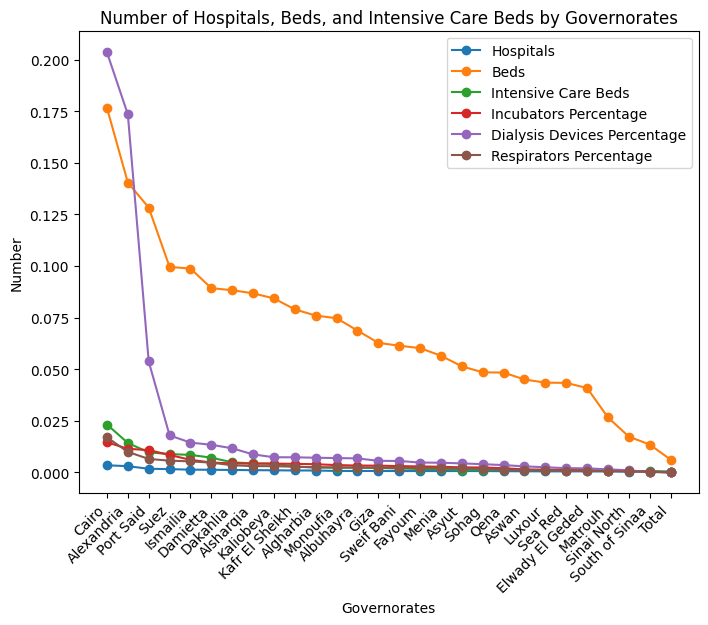

In [ ]:
plt.figure(figsize=(8, 6))
ax = plt.subplot(111)
ax.plot(governorates_hospitals['Governorates'], governorates_hospitals['Hospital Percentage'].sort_values(ascending=False), label='Hospitals', marker='o')
ax.plot(governorates_hospitals['Governorates'], governorates_hospitals['Beds Percentage'].sort_values(ascending=False), label='Beds', marker='o')
ax.plot(governorates_hospitals['Governorates'], governorates_hospitals['Intensive Care Beds Percentage'].sort_values(ascending=False), label='Intensive Care Beds', marker='o')
ax.plot(governorates_hospitals['Governorates'], governorates_hospitals['Incubators Percentage'].sort_values(ascending=False),label='Incubators Percentage', marker='o')
ax.plot(governorates_hospitals['Governorates'], governorates_hospitals['Dialysis Devices Percentage'].sort_values(ascending=False),label='Dialysis Devices Percentage', marker='o')
ax.plot(governorates_hospitals['Governorates'], governorates_hospitals['Respirators Percentage'].sort_values(ascending=False),label='Respirators Percentage', marker='o')

ax.set_xlabel('Governorates')

ax.set_ylabel('Number')
ax.set_title('Number of Hospitals, Beds, and Intensive Care Beds by Governorates')
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.show()

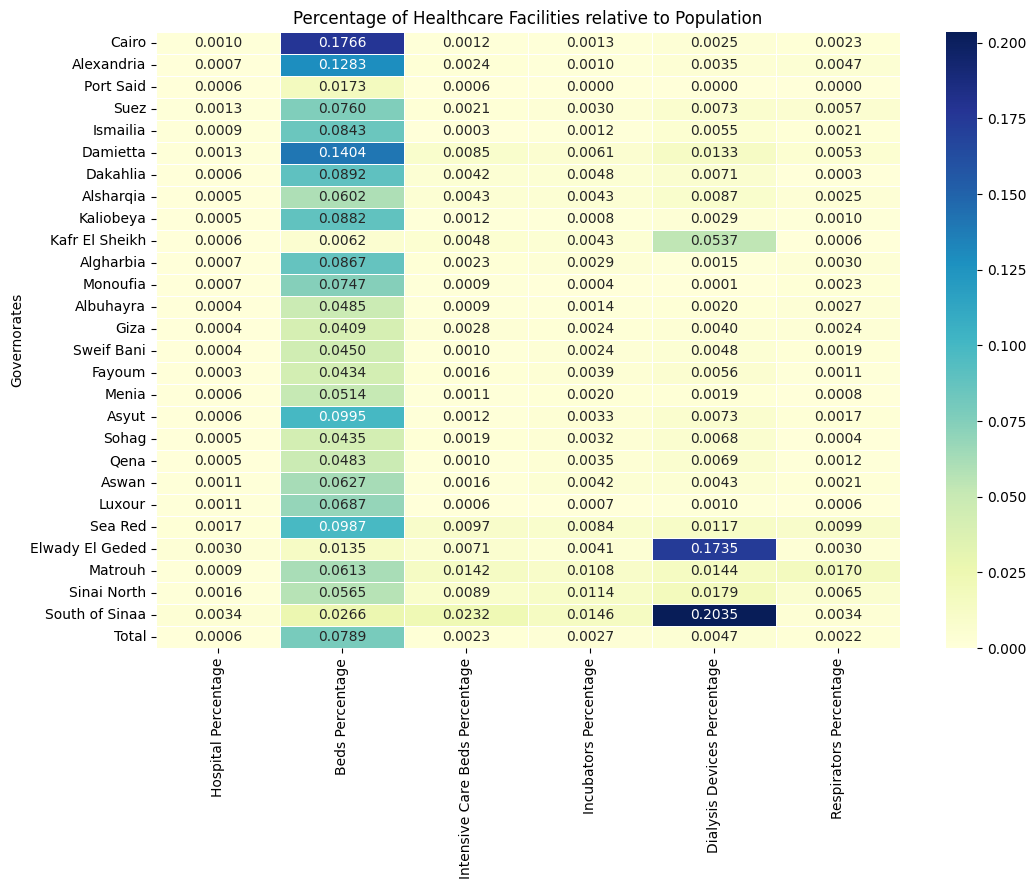

In [ ]:
heatmap_data = governorates_hospitals.set_index('Governorates')[['Hospital Percentage', 'Beds Percentage', 'Intensive Care Beds Percentage', 'Incubators Percentage', 'Dialysis Devices Percentage', 'Respirators Percentage']]

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="YlGnBu", linewidths=.5)
plt.title('Percentage of Healthcare Facilities relative to Population')
plt.show()